# **PCA**

#  Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/wine.csv')
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [3]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [6]:
#Examine the Distribution of Features
import matplotlib.pyplot as plt
import seaborn as sns


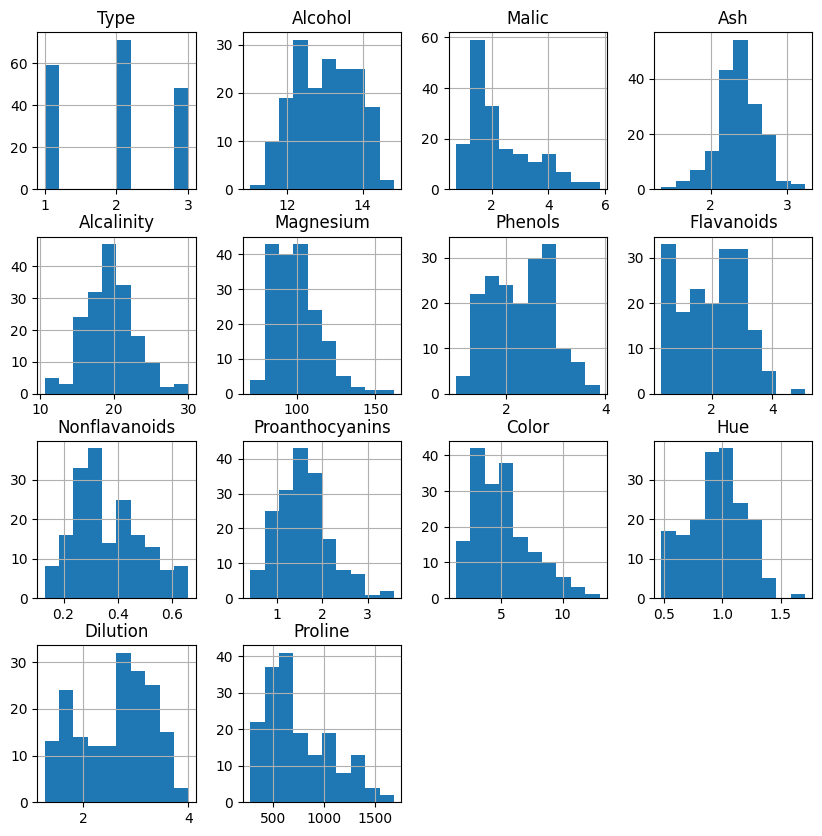

In [7]:
# Histograms
df.hist(figsize=(10, 10))
plt.show()


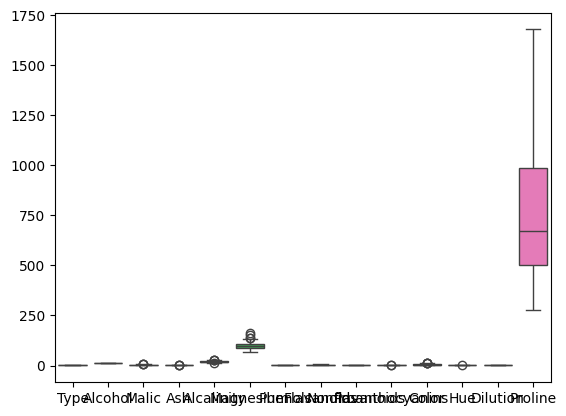

In [8]:
# Box plots
sns.boxplot(data=df)
plt.show()


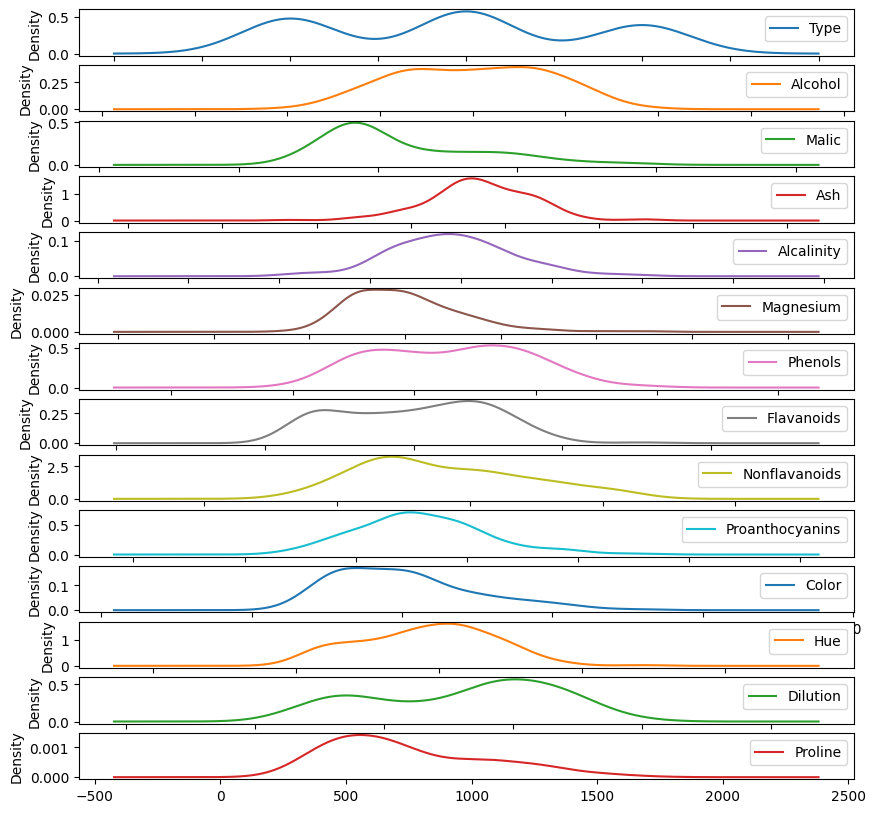

In [9]:
# Density plots
df.plot(kind='density', subplots=True, sharex=False, figsize=(10, 10))
plt.show()

In [10]:
#Investigate Correlations Between Features
# Correlation matrix
correlation_matrix = df.corr()

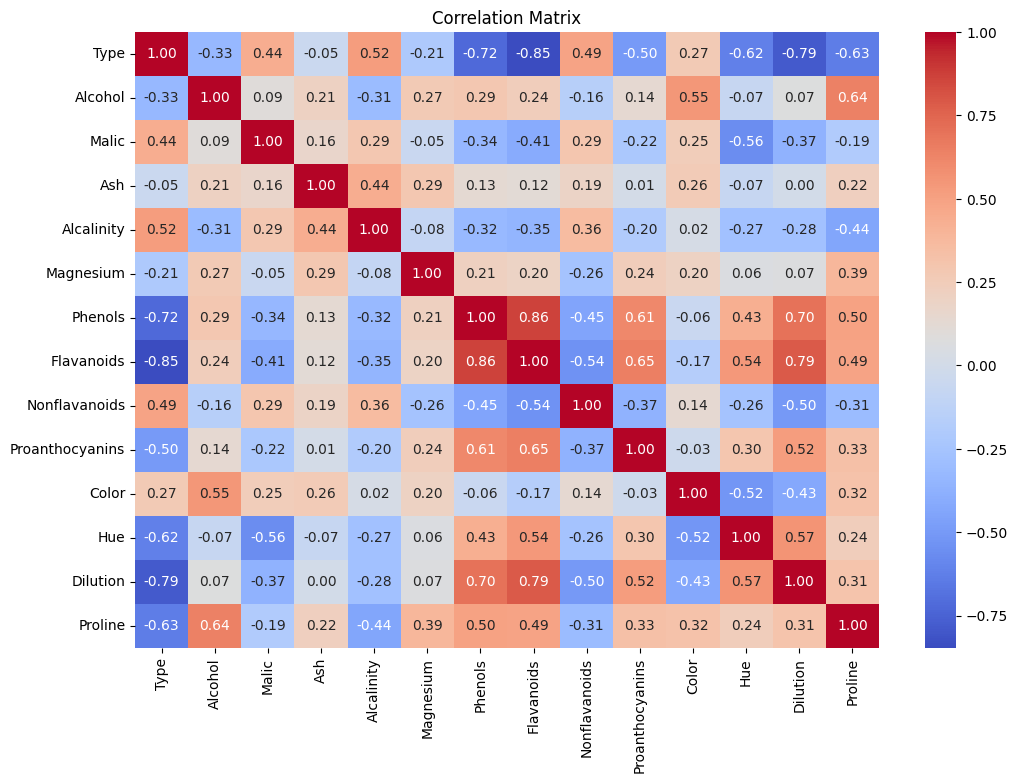

In [11]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Dimensionality Reduction with PCA:**

In [12]:
#Standardize the Features
from sklearn.preprocessing import StandardScaler

In [13]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [14]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [15]:
#Determine the Optimal Number of Principal Components
from sklearn.decomposition import PCA


In [16]:
# Initialize PCA
pca = PCA()


In [17]:
# Fit PCA to the standardized features
pca.fit(scaled_features)


PCA()

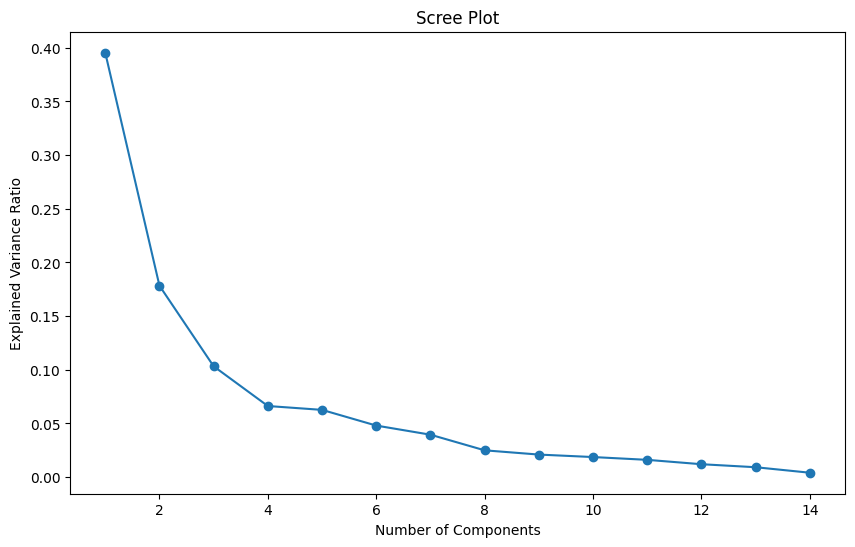

In [18]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


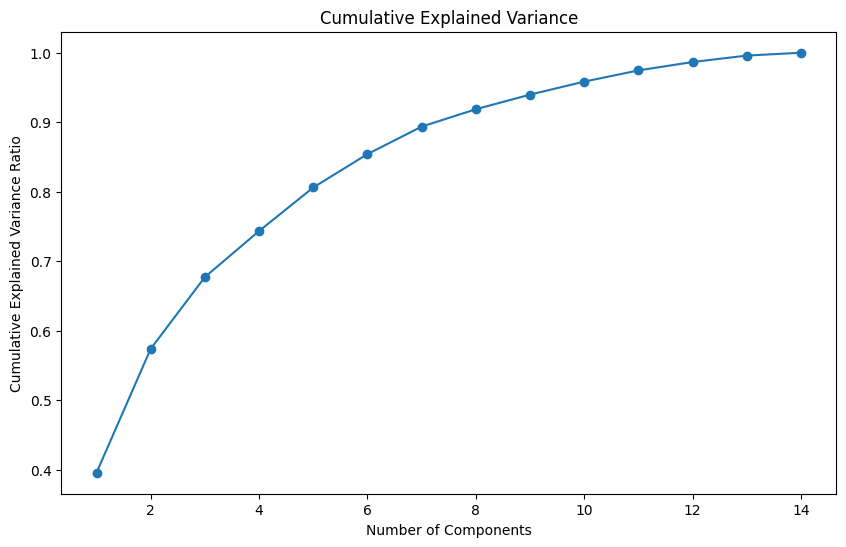

In [19]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [20]:
#Transform the Original Dataset into Principal Components
# Determine the number of components
num_components = 5  # Choose based on the scree plot or cumulative explained variance


In [21]:
# Initialize PCA with the optimal number of components
pca = PCA(n_components=num_components)

In [22]:
# Transform the original dataset into principal components
principal_components = pca.fit_transform(scaled_features)


In [23]:
# Convert the principal components to a DataFrame
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, num_components + 1)])
principal_df

PC1       PC2       PC3       PC4       PC5
0   -3.522934 -1.453098 -0.164795 -0.013273  0.737345
1   -2.528858  0.330019 -2.026707 -0.417144 -0.283214
2   -2.785029 -1.036936  0.983238  0.664232 -0.387565
3   -3.922588 -2.768210 -0.174968  0.565088 -0.324360
4   -1.407511 -0.867773  2.025829 -0.440906  0.227949
..        ...       ...       ...       ...       ...
173  3.627996 -2.206617 -0.343668  0.751705 -1.004109
174  2.942729 -1.752263  0.207480  0.399381  0.154223
175  3.027272 -2.756040 -0.940803  0.607758  1.128136
176  2.755222 -2.293784 -0.550474 -0.391570  1.067083
177  3.496336 -2.760608  1.013151  0.349630 -1.005136

[178 rows x 5 columns]

**Clustering with Original Data:**

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

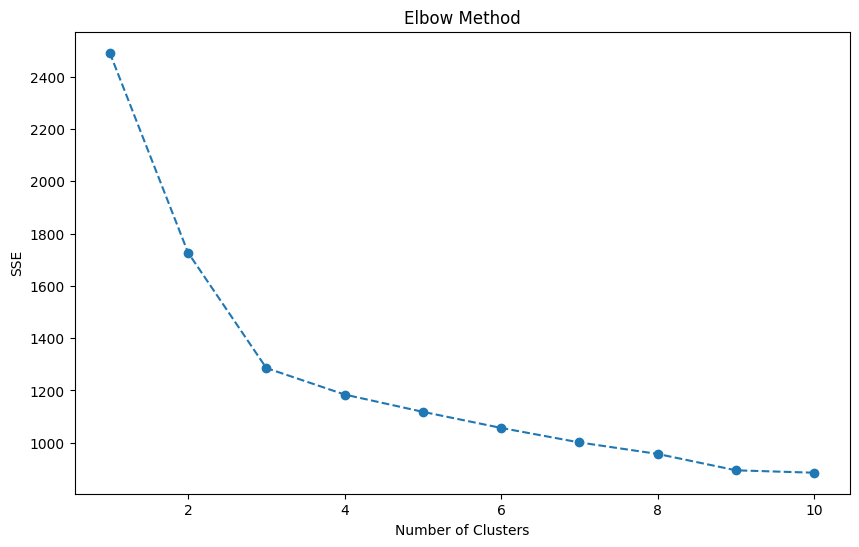

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


In [44]:
# Assuming we choose 3 clusters based on the elbow plot
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
# Evaluate the clustering performance
sil_score = silhouette_score(scaled_features, df['Cluster'])
db_score = davies_bouldin_score(scaled_features, df['Cluster'])


In [49]:
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.30773604383565206
Davies-Bouldin Index: 1.3163957434114109


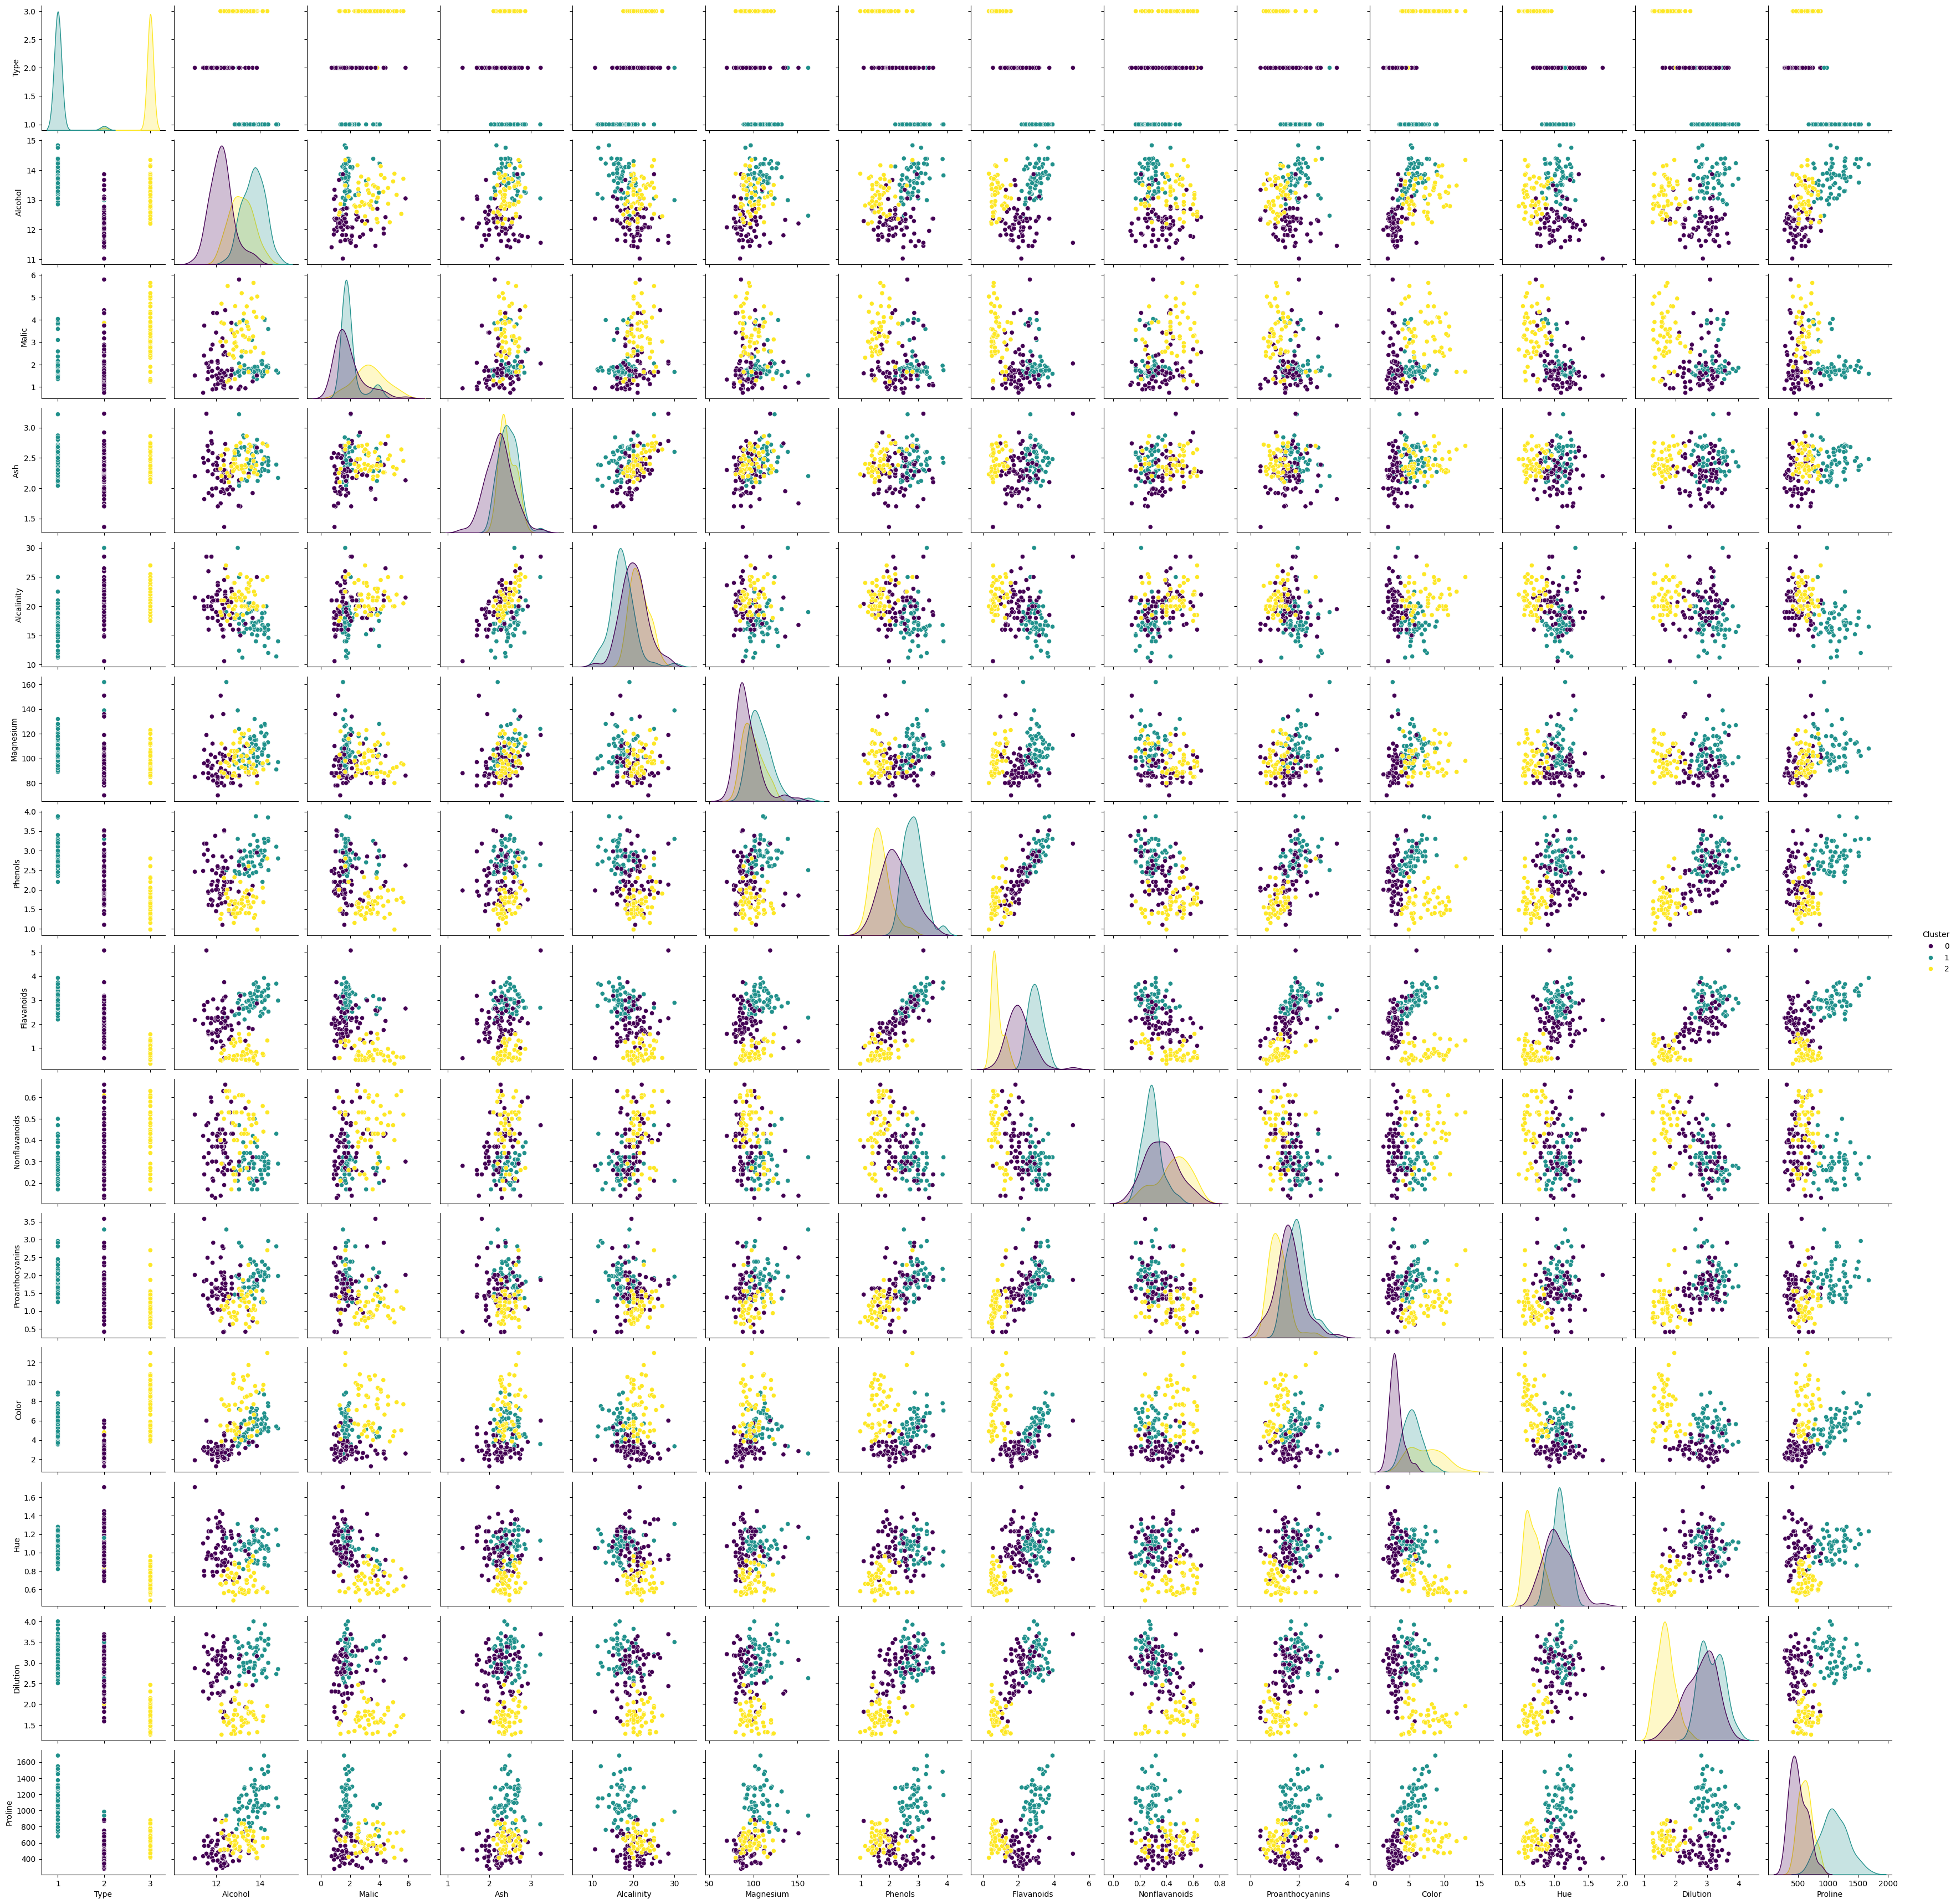

In [50]:
# Visualize the clusters using pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


**Clustering with PCA Data**

In [52]:
# Apply K-means clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans_pca.fit(principal_components )

# Get cluster labels
cluster_labels_pca = kmeans_pca.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualize the clustering results from PCA-transformed data:

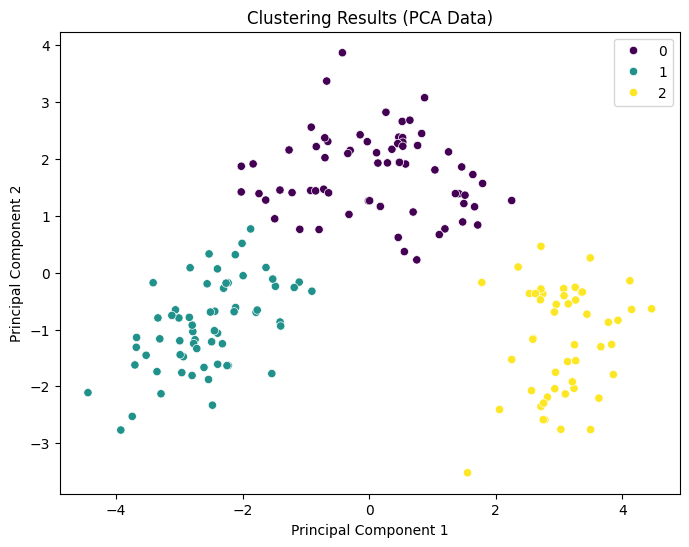

In [53]:
# Example for 2D visualization (adjust for higher dimensions)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cluster_labels_pca, palette='viridis', legend='full')
plt.title('Clustering Results (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [25]:
# Initialize K-means with the desired number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [26]:
# Fit K-means to the original dataset
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [27]:
# Get cluster labels for each data point
cluster_labels = kmeans.labels_

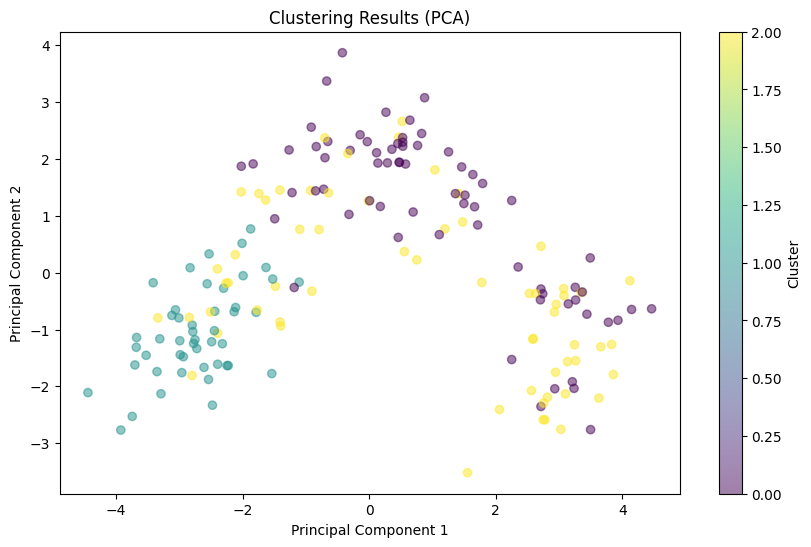

In [28]:
# Visualize clusters using PCA
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [29]:
#Evaluate Clustering Performance
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [30]:
# Silhouette score
silhouette = silhouette_score(df, cluster_labels)
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.5711220218931753


In [31]:
# Davies–Bouldin index
db_index = davies_bouldin_score(df, cluster_labels)
print(f'Davies–Bouldin Index: {db_index}')

Davies–Bouldin Index: 0.5342660703679686


In [32]:
#Apply Clustering Algorithm to PCA-Transformed Data
# Initialize K-means with the desired number of clusters
kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)

In [33]:
# Fit K-means to the PCA-transformed dataset
kmeans_pca.fit(principal_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [35]:
# Get cluster labels for each data point
cluster_labels_pca = kmeans_pca.labels_

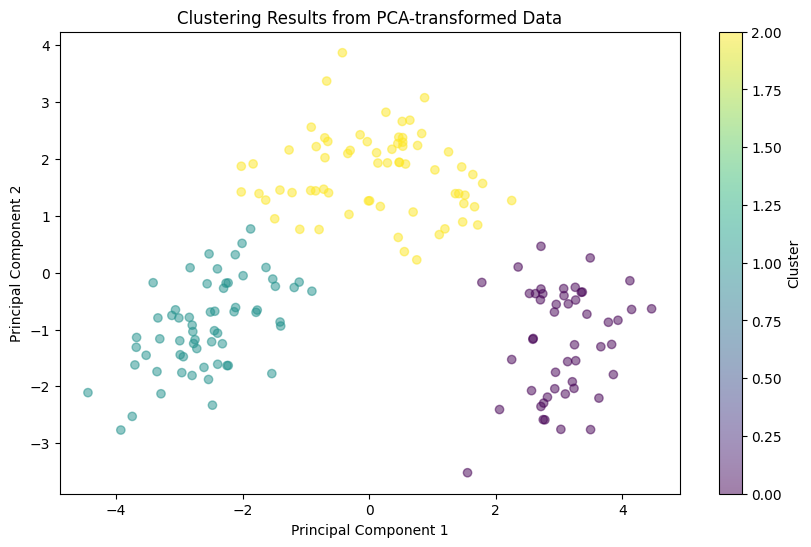

In [36]:
# Visualize clusters obtained from PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=cluster_labels_pca, cmap='viridis', alpha=0.5)
plt.title('Clustering Results from PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [38]:
# Visualize clusters obtained from original data for comparison
plt.figure(figsize=(20, 10))
plt.scatter(df['Feature1'], df['Feature2'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Results from Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

KeyError: 'Feature1'

<Figure size 2000x1000 with 0 Axes>

In [39]:
# Compare silhouette scores
silhouette_pca = silhouette_score(principal_df, cluster_labels_pca)
print(f'Silhouette Score from PCA-transformed Data: {silhouette_pca}')


Silhouette Score from PCA-transformed Data: 0.39846959730060005


In [ ]:
# Compare Davies–Bouldin index
db_index_pca = davies_bouldin_score(principal_df, cluster_labels_pca)
print(f'Davies–Bouldin Index from PCA-transformed Data: {db_index_pca}')

Davies–Bouldin Index from PCA-transformed Data: 1.0198447239039343


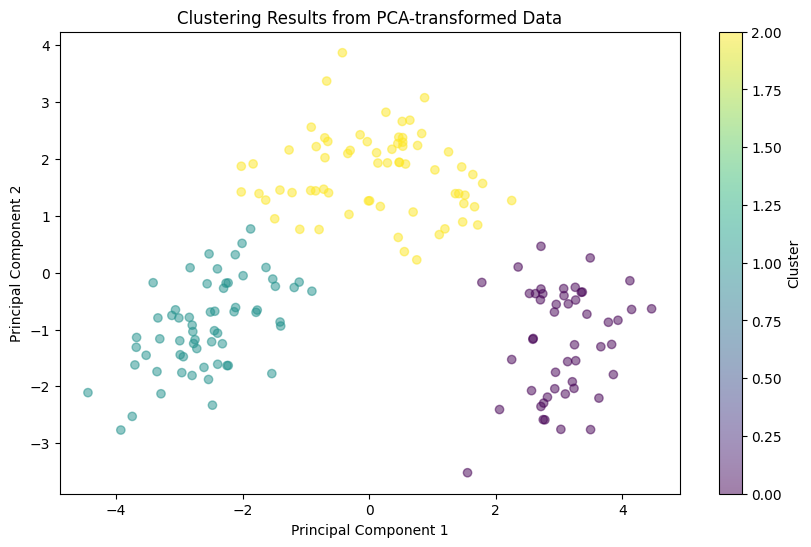

In [ ]:
# Visualize clusters obtained from PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=cluster_labels_pca, cmap='viridis', alpha=0.5)
plt.title('Clustering Results from PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()